<a href="https://colab.research.google.com/github/renan-gomes/Data_Science_portfolio/blob/main/Time_Series_Analyses_Exploring_temperature_patterns_in_S%C3%A3o_Paulo_(1946_2019)%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_sao_paulo='https://raw.githubusercontent.com/renan-gomes/Data_Science_portfolio/main/time-series/station_sao_paulo.csv'
data = pd.read_csv(data_sao_paulo)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    74 non-null     int64  
 1   JAN     74 non-null     float64
 2   FEB     74 non-null     float64
 3   MAR     74 non-null     float64
 4   APR     74 non-null     float64
 5   MAY     74 non-null     float64
 6   JUN     74 non-null     float64
 7   JUL     74 non-null     float64
 8   AUG     74 non-null     float64
 9   SEP     74 non-null     float64
 10  OCT     74 non-null     float64
 11  NOV     74 non-null     float64
 12  DEC     74 non-null     float64
 13  D-J-F   74 non-null     float64
 14  M-A-M   74 non-null     float64
 15  J-J-A   74 non-null     float64
 16  S-O-N   74 non-null     float64
 17  metANN  74 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 10.5 KB


In [4]:
data.set_index("YEAR", inplace=True)

In [5]:
data.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,89.674054,89.936081,89.213378,87.493649,71.922432,84.152838,83.816216,71.635541,59.347703,60.510270,61.287973,62.395541,76.256892,60.832838,70.999595,60.396216,60.502162
std,246.699892,246.628547,246.823860,247.291396,223.345679,248.196142,248.287611,223.415845,194.660240,194.420687,194.258439,194.028895,222.302015,194.350945,223.567207,194.441847,194.418847
min,20.780000,21.540000,20.740000,17.940000,16.200000,15.440000,14.520000,15.640000,16.420000,17.040000,18.940000,20.340000,21.600000,19.170000,15.670000,18.010000,19.110000
25%,22.802500,23.262500,22.532500,20.405000,18.292500,17.017500,16.842500,17.675000,18.845000,19.905000,21.050000,22.062500,22.795000,20.702500,17.425000,20.090000,20.492500
50%,23.735000,24.145000,23.405000,21.430000,18.920000,17.765000,17.620000,18.775000,19.615000,20.980000,21.700000,22.815000,23.625000,21.150000,18.065000,20.845000,20.855000
75%,24.890000,24.965000,24.025000,22.437500,19.492500,18.885000,18.415000,19.600000,20.530000,21.830000,22.540000,23.757500,24.252500,21.750000,18.677500,21.335000,21.380000
max,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000


### 'std' > 400ºC and '75%' > 50ºC indicate that absurd temperature values are present in the dataset.

In [6]:
#Dropping average columns
temps = data.loc[:,'JAN':'DEC']
#Dropping rows if only not consistent are present
temps = temps.applymap(lambda x: np.nan if x > 37.8 else x) #Highest temperature measured in Sao Paulo
#Using the interpolation to fill NAs
for col in temps.columns:
  temps[col].interpolate(method='linear', inplace=True)
temps = temps.dropna(thresh=12) #Droping entries missing data

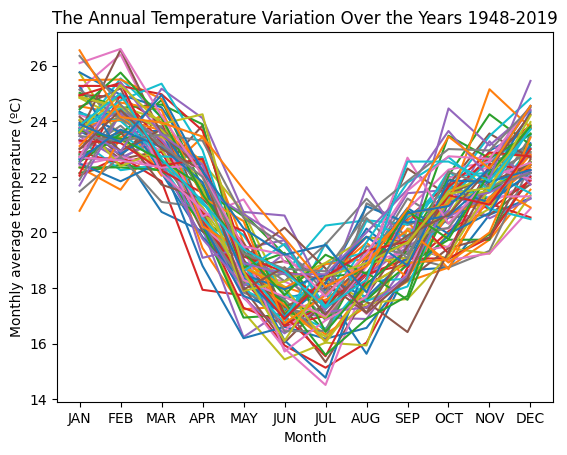

In [7]:
#Checking how the temperature varies across the year
x=temps.columns[:]
y=temps.iloc[:,:]

for row in range(0,y.shape[0]):
    plt.plot(x, y.iloc[row,:])
plt.xlabel('Month')
plt.ylabel('Monthly average temperature (ºC)')
plt.title('The Annual Temperature Variation Over the Years 1948-2019')

plt.show()

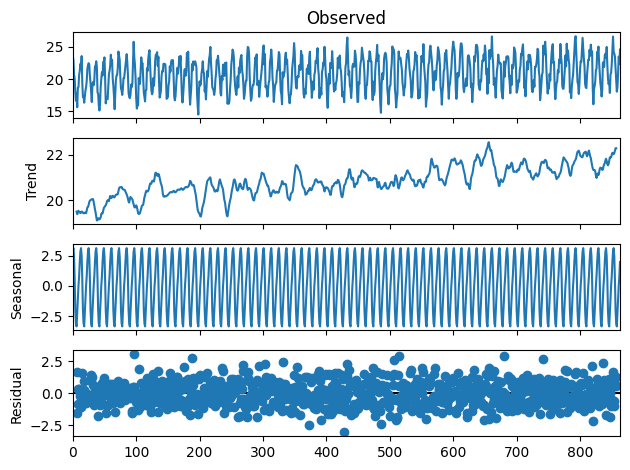

In [8]:
#Checking how the temperature varies in a seasonal way and if there is a trend in the data
all_temps=[]
for row in temps.index:
  for col in temps.columns:
      all_temps.append(temps.loc[row,col])

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(all_temps, model='additive', period=12)
decomposition.plot()
plt.show()

### These graphs suggest that the temperature change in São Paulo is seasonal.

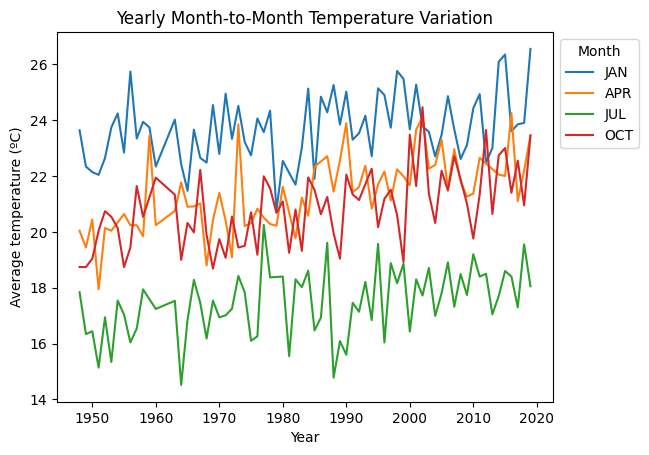

In [9]:
#Checking if there is a trend in the data using alternative approaches

#Assessing different seasons

x=temps.index
months=[0,3,6,9] #Selecting one month from each season
y=temps.iloc[:,months]
for col in y.columns:
    plt.plot(x, y[col], label=col)

plt.xlabel('Year')
plt.ylabel('Average temperature (ºC)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title = 'Month')
plt.title('Yearly Month-to-Month Temperature Variation')
plt.show()

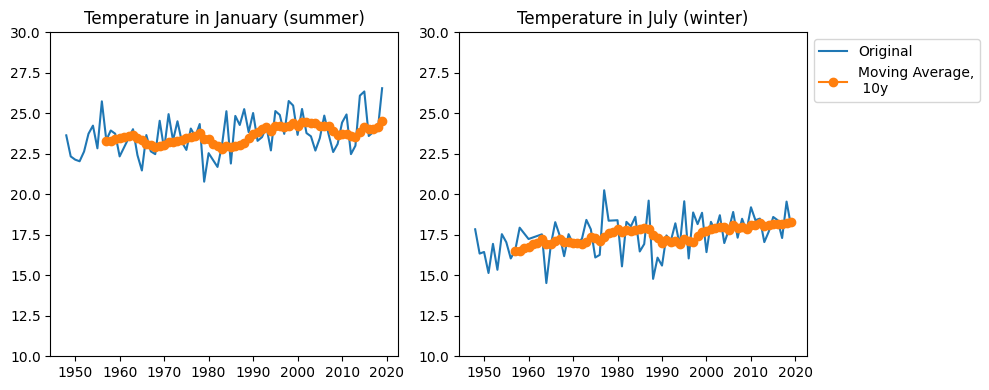

In [15]:
#Using moving averages

temps_movavg = pd.DataFrame()
temps_movavg['JAN'] = temps['JAN'].rolling(window=10).mean()
temps_movavg['JUL'] = temps['JUL'].rolling(window=10).mean()
temps_movavg.set_index(temps.index, inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 linha, 2 colunas
axs[0].plot(temps_movavg.index, temps['JAN'], label='Original')
axs[0].plot(temps_movavg.index, temps_movavg['JAN'], label='Moving Average', marker = 'o')
axs[0].set_ylim(10,30)
axs[0].set_title('Temperature in January (summer)')


axs[1].plot(temps_movavg.index, temps['JUL'], label='Original')
axs[1].plot(temps_movavg.index, temps_movavg['JUL'], label='Moving Average,\n 10y', marker = 'o')
axs[1].set_ylim(10,30)
axs[1].set_title('Temperature in July (winter)')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

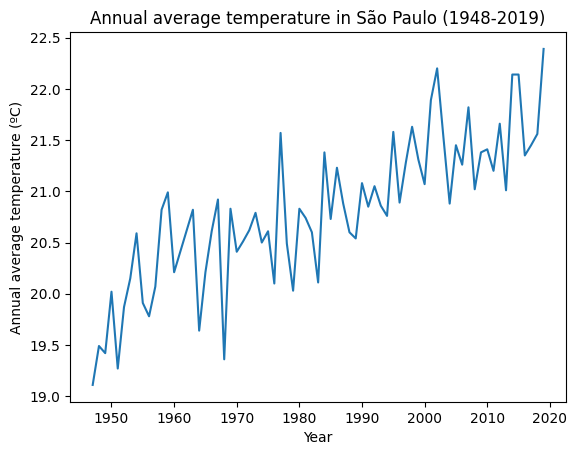

In [21]:
#Checking annual averages

y = data[data['metANN']<40]['metANN']
x = data[data['metANN']<40].index
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Annual average temperature (ºC)')
plt.title('Annual average temperature in São Paulo (1948-2019)')
plt.show()

### All graphical representations consistently indicate a sustained upward trend, irrespective of whether observed on a monthly or annual basis.

In [12]:
decades = list(range(1950,2020,10))
decades_list = list(zip(decades, decades[1:]))

temps_dec_lst = []

for start, end in decades_list:
  temps_dec_lst.append(temps.loc[start:end-1,:])

In [17]:
list_of_angular_coefs=[]
for df in temps_dec_lst:
  all_temps2=[]
  for row in df.index:
    for col in df.columns:
        all_temps2.append(df.loc[row,col])
  y=all_temps2
  x=range(1,121)

  # Ajuste de uma linha de regressão (reta) usando numpy.polyfit
  coefs = np.polyfit(x, y, 1)
  list_of_angular_coefs.append(coefs[0])

greater_ang_coef=max(list_of_angular_coefs)
greater_ang_coef_decade=list_of_angular_coefs.index(greater_ang_coef)
print(f"The greater angular coeficient is {greater_ang_coef:.4f}°C/month and was observed during {temps_dec_lst[0].index[0]}-{temps_dec_lst[0].index[-1]} decade.")
print(f'During this decade, the temperature increased by an average of {greater_ang_coef*12:.1f}°C per year.')

The greater angular coeficient is 0.0077°C/month and was observed during 1950-1959 decade.
During this decade, the temperature increased by an average of 0.1°C per year.


### The greater angular coeficient is 0.0077 and was observed during 1950-1959 decade.
### This means that, during this decade, the temperature increased by, on average, 2.8°C per year.